# Traffic Prediction

## 1. Module Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## 2. Loading Data

In [ ]:

df = pd.read_csv('C:/Users/nguye/Documents/traffic-situation-prediction/data/TrafficTwoMonth.csv')
df.head()


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


## 3. Feature Engineering

### 3.1 Decision Tree

In [4]:
#Tiền xử lý dữ liệu
#chọn các cột đặc trưng và nhãn
X = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total',]]
Y = df[['Traffic Situation']]

In [5]:
#phân chia dữ liệu
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
#kiểm tra kích thước dữ liệu
print(f"Kích thước tập huấn luyện:{X_train.shape}")
print(f"Kích thước tập kiểm tra: {X_test.shape}")

Kích thước tập huấn luyện:(4166, 5)
Kích thước tập kiểm tra: (1786, 5)


In [6]:
#khởi tạo và huấn luyện mô hình Decision Tree
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
#huấn luyện mô hình với dữ liệu huấn luyện
dt_model.fit(X_train, Y_train)

#kiểm tra độ chính xác trên tập huấn luyện 
train_accurary = dt_model.score(X_train, Y_train)
print(f"Độ chính xác trên tập huấn luyện:{train_accurary*100:.2f}%")
#kiểm tra độ chính xác trên tập kiểm tra 
test_accuracy = dt_model.score(X_test,Y_test)
print(f"Độ chính xác của mô hình kiểm tra: {test_accuracy*100:.2f}%")

#dự đoán trên tập kiểm tra 
y_pred = dt_model.predict(X_test)

#in kết quả dự đoán và so sánh với nhãn thực tế
print("Dự đoán tình trạng giao thông trên tập kiểm tra:")
print(y_pred[:10]) #in ra 10 kết quả đầu tiên

print("So sánh với tình trạng giao thông thực tế:")
print(Y_test.values[:10]) #in ra 10 kết quả nhãn thực tế

Độ chính xác trên tập huấn luyện:89.61%
Độ chính xác của mô hình kiểm tra: 88.24%
Dự đoán tình trạng giao thông trên tập kiểm tra:
['low' 'normal' 'normal' 'normal' 'normal' 'normal' 'heavy' 'low' 'normal'
 'normal']
So sánh với tình trạng giao thông thực tế:
[['low']
 ['normal']
 ['normal']
 ['high']
 ['normal']
 ['normal']
 ['heavy']
 ['low']
 ['normal']
 ['normal']]


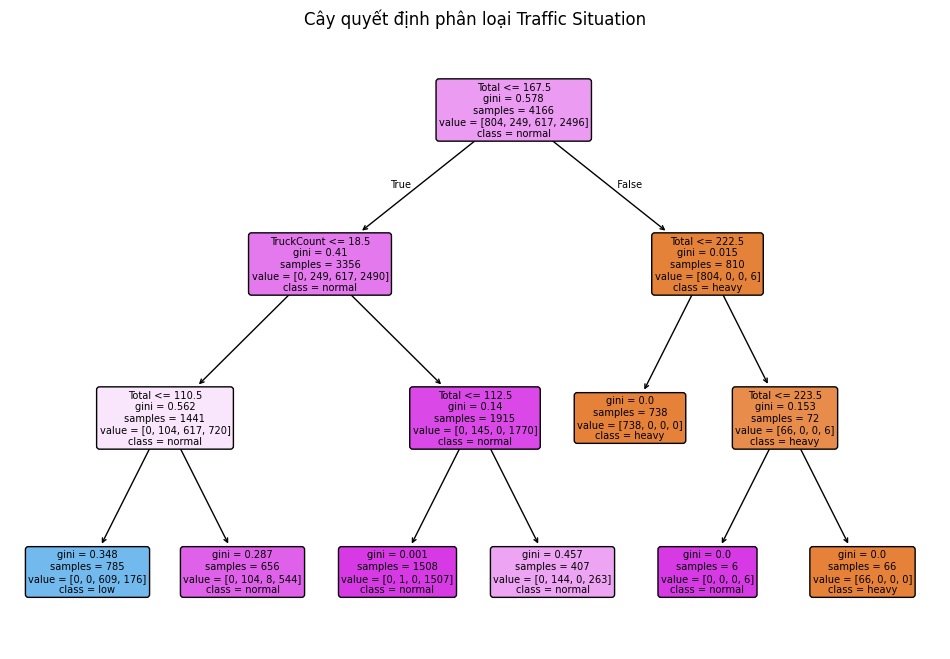

In [7]:
#vẽ sơ đồ cây quyết định
plt.figure(figsize=(12,8))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_, filled=True, rounded=True)
plt.title("Cây quyết định phân loại Traffic Situation")
plt.show()